In [28]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

seed = 42
random.seed(seed)
np.random.seed(seed)

In [29]:
def create_dataset(root_dir, grayscale=True):
    image_list = []
    target_list = []
    target = 0
    c = 0
    limit = 5
    
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            target_list.append(target)
            file_path = os.path.join(subdir, file)
            try:
                with Image.open(file_path) as img:
                    if grayscale:
                        img = img.convert('L')
                    resized_img = img.resize((32, 32))
                    img_array = np.array(resized_img)
                    image_list.append(img_array)
            except Exception as e:
                print(f"Error loading image {file_path}: {e}")
        target += 1

        if c == limit:
            break
        c += 1

    return (np.array(image_list), np.array(target_list))

In [30]:
dataset_dir = 'C:/Users/enzol/PycharmProjects/5IABD_UnsupervisedDL/data2'

X, y = create_dataset(dataset_dir, grayscale=True)

In [31]:
# Normalization
X = X / 255.0

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)

(16000, 32, 32) (16000,)


In [33]:
np.unique(y_train)

array([1, 2, 3, 4, 5])

In [34]:
input_dim = x_train.shape[1:]
input_dim

(32, 32)

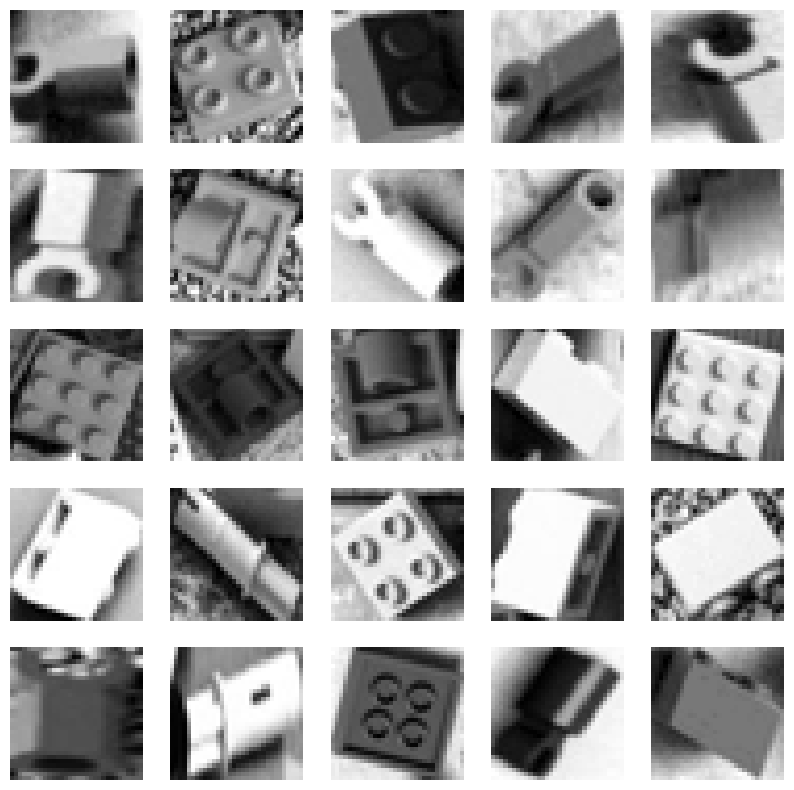

In [35]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i, :, :], cmap='gray')
    plt.axis('off')
plt.show()

In [36]:
print (x_train.shape)
print (x_test.shape)

(16000, 32, 32)
(4000, 32, 32)


In [37]:
from autoencoder import Autoencoder_CNN

Without hidden layers (binary_crossentropy + relu)

In [38]:
encoding_dim = 2
epochs = 100
batch_size = 512

autoencoder = Autoencoder_CNN(input_dim=(32, 32, 1),
                        encoding_dim=encoding_dim,
                        loss='binary_crossentropy',
                        activation='relu',)

autoencoder.train(x_train, x_test, epochs=epochs, batch_size=batch_size)

Epoch 1/100
32/32 [==============================] - 2s 40ms/step - loss: 0.6757 - val_loss: 0.6615
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6531 - val_loss: 0.6383
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6331 - val_loss: 0.6307
Epoch 4/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6301 - val_loss: 0.6299
Epoch 5/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6289 - val_loss: 0.6296
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6287 - val_loss: 0.6282
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6280 - val_loss: 0.6309
Epoch 8/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6283 - val_loss: 0.6280
Epoch 9/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6276 - val_loss: 0.6277
Epoch 10/100
32/32 [==============================] - 1s 35ms/step - loss: 0.6277 - val_loss: 0.6277

Visualization

125/125 [==============================] - 0s 1ms/step


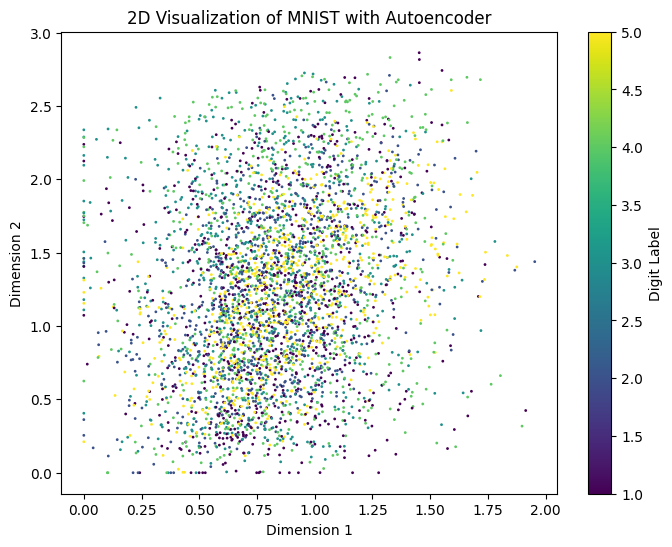

In [39]:
autoencoder.visualize_2d(x_test, y_test, False)

In [40]:
def plot_comparison(original, reconstructed, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(32, 32), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(32, 32), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

Compression and decompression

125/125 [==============================] - 0s 1ms/step


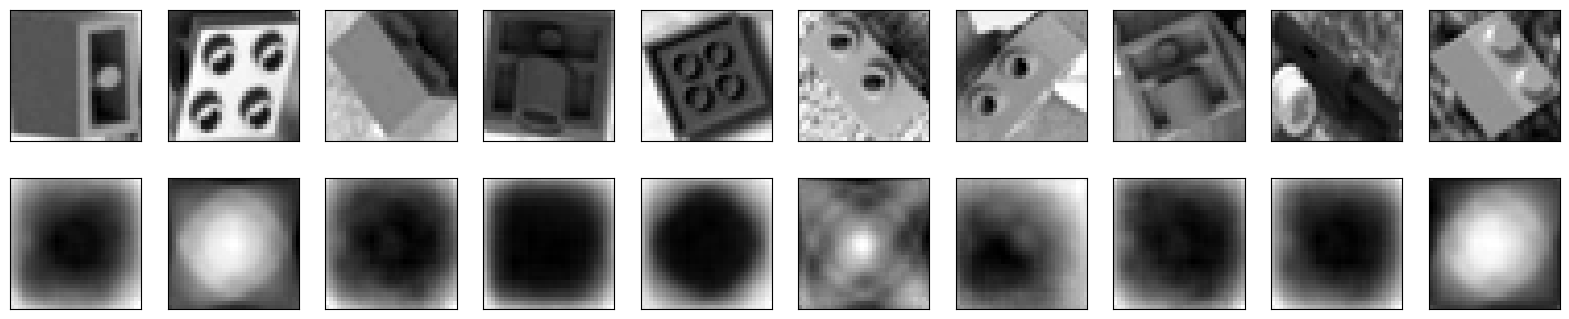

In [41]:
encoded_data = autoencoder.compress(x_test)
decoded_data = autoencoder.decompress(encoded_data)

plot_comparison(x_test, decoded_data)

Image generation

1/1 [==============================] - 0s 50ms/step


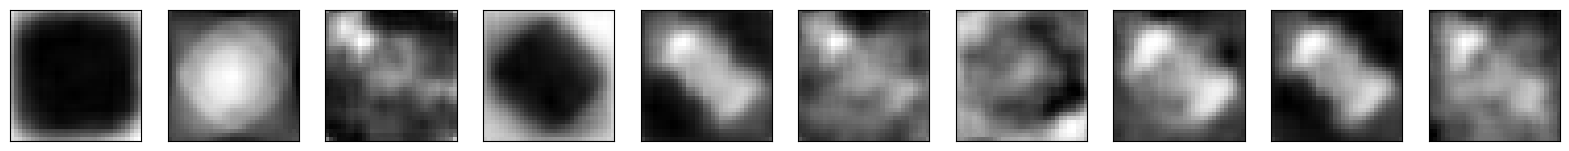

In [42]:
num_samples = 10
random_latent_vectors = np.random.normal(size=(num_samples, encoding_dim))

synthetic_imgs = autoencoder.decoder.predict(random_latent_vectors)

plt.figure(figsize=(20, 4))
for i in range(num_samples):
    ax = plt.subplot(1, num_samples, i + 1)
    plt.imshow(synthetic_imgs[i].reshape(32, 32))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()